In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [110]:
df = pd.read_csv('sendy_logistics.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [122]:
# Using sendy_logistics.csv extract user_id in a seperate column.
df['User Id'][0].split('_')[2]

'633'

In [123]:
def User_Id(text):
    text = text.split("_")
    return text[2]
df['User Id'] = df['User Id'].apply(User_Id)

In [124]:
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380


In [30]:
# (72°F − 32) × 5/9 = 22.222°C
def TempInDegrees():
    response = requests.get('https://weather.com/weather/today/l/ad1f0514804c519d418eed7e5c594bf6e3b5f35a95e3a0ed5887bb67ec8a1667')
    data = BeautifulSoup(response.text, "html.parser")
    x = int(data.find('span', {'class': 'CurrentConditions--tempValue--3a50n'}).get_text().split('°')[0])
    x = (x - 32) * 5/9
    return x
x = TempInDegrees()

In [35]:
df['Temp_Diff'] = abs(x - df['Temperature']) 

In [29]:
int(data.find('span', {'class': 'CurrentConditions--tempValue--3a50n'}).get_text().split('°')[0])

72

In [37]:
def ConverToDegree(x):
    return (x - 32) * 5/9
df['Fehr_Temp'] = df.Temperature.apply(ConverToDegree)

In [40]:
# Using ufo.csv dataset, extract Month from &#39;Time&#39; and use it to create new column and call it
# &#39;IN_December&#39;, then it will have a value of &#39;1&#39; if the month is December and &#39;0&#39; otherwise.

df = pd.read_csv('ufo.csv')
df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [46]:
df['Time'] = pd.to_datetime(df['Time'], format='%m/%D/%Y %H:%M')

In [48]:
def MonthDecember(x):
    if x == 12:
        return 1
    else:
        return 0
df['IN_December'] = df['Time'].dt.month.apply(MonthDecember)

In [64]:
# Using ufo.csv dataset, create new column and call it &#39;Time_Diff_From_WW1&#39; that have time
# difference in years from the &#39;Time&#39; Column and World War 1 start date that is &#39;July 28, 1914&#39;.

import datetime 
df['Elapsed_years']=(datetime.datetime(1914, 7, 28)-df['Time'])/np.timedelta64(1,'Y')#M,D H m

In [66]:
# Using titanic_full.csv dataset, extract Mr,Miss,Mrs,etc.. from &#39;Name&#39; column and use it to create new
# column and call it &#39;Title&#39;, then plot a countplot
df = pd.read_csv('titanic_full.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [104]:
# Mr. Miss. Mrs. Ms.
import re
def string(text):
    x = re.findall('M(?:rs?|s|iss)', text)
    try:
        return x[0]
    except:
        return np.nan
df['Title'] = df.Name.apply(string)

In [105]:
type(df.Title[0])

str

In [108]:
# showing the count for each title in the dataset.
df.Title.value_counts()

Mr      518
Miss    182
Mrs     127
Ms        1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

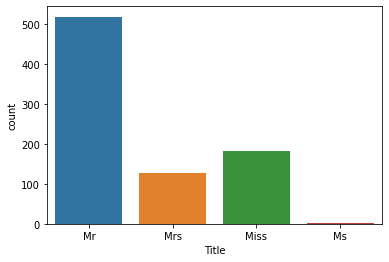

In [109]:
sns.countplot(x=df.Title)

In [125]:
# Using visitor-interests.csv dataset, from the first 50 row extract Browser, OS, Device data from
# &#39;UserAgent&#39; column and use it to create new columns for Browser, OS, Device.
df = pd.read_csv('visitor-interests.csv')
df

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine


In [126]:
import user_agents
ua = user_agents.parse(df['UserAgent'][0])

In [128]:
ua.browser.family

'Chrome'

In [143]:
def OsBrowserDevice(text):
    return pd.Series((user_agents.parse(text).browser.family,user_agents.parse(text).device.family,user_agents.parse(text).os.family))
df[['Browser', 'Device', 'Os']] = df['UserAgent'].apply(OsBrowserDevice)   

In [144]:
df

,IP,UserAgent,Country,Languages,Interests,Browser,Device,Os
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Other,Windows
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Other,Windows
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Other,Windows
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Nexus 9,Android
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iPad,iOS
...,...,...,...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website,Chrome Mobile,Samsung SM-N920S,Android
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website,Chrome Mobile,Samsung SM-N920S,Android
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution,QQ Browser Mobile,vivo X7L,Android
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine,Firefox,Mac,Mac OS X


In [ ]:
# Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from &#39;IP&#39; column.


In [149]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

response=ip2geo.get('121.133.168.51',api_key='free')
response.city

'Seongnam-si (Bundang-gu)'

In [150]:
response.latitude

37.378575850000004

In [153]:
df = df.sample(100)

In [155]:
def lat_lon(ip):
    response=ip2geo.get(ip,api_key='free')
    return pd.Series((response.longitude, response.latitude))
df[['longitude', 'latitude']] = df.IP.apply(lat_lon)

In [157]:
# Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from &#39;IP&#39; column
# and use it to create new &#39;Dist_From_Egypt&#39; column calculating distance with Egypt Lat/Lonng, you can
# get this location from google.
from geopy.distance import great_circle
import pycountry

In [158]:
pycountry.

,IP,UserAgent,Country,Languages,Interests,Browser,Device,Os,longitude,latitude
6449,79.169.231.106,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,PT,english,company,Chrome,Other,Windows,-9.136592,38.707751
10534,105.162.200.175,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,NaN,english,company,Chrome,Other,Windows,36.798966,-1.243643
18634,203.168.116.52,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,JP,japanese,shop/online shopping website,Mobile Safari,iPhone,iOS,132.451816,34.391606
18736,204.29.160.175,Mozilla/5.0 (X11; CrOS x86_64 8350.68.0) Apple...,US,english,blog/personal homepage,Chrome,Other,Chrome OS,-81.580923,30.328224
3041,47.29.133.157,Mozilla/5.0 (Linux; U; Android 5.1.1; en-US; L...,CA,english,educational institution,UC Browser,LS-5009,Android,74.843008,12.869810
...,...,...,...,...,...,...,...,...,...,...
3604,54.172.199.237,-,US,english,company/other,Other,Other,Other,-77.469646,39.030019
9961,103.254.246.46,Mozilla/5.0 (Windows NT 6.1; rv:48.0) Gecko/20...,NaN,english,internet directory/search engine,Firefox,Other,Windows,72.579707,23.021624
3747,59.95.167.152,Mozilla/5.0 (Linux; U; Android 4.4.2; en-US; L...,IN,english,shop/online shopping website,UC Browser,Lenovo TAB 2 A7-30HC,Android,76.962842,11.001812
17904,196.26.220.43,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ZA,english,company,Chrome,Other,Windows,28.012086,-26.077529


In [167]:
from geopy.geocoders import Nominatim
locator=Nominatim(user_agent='fgh')
resp=locator.geocode('Cairo Festival, Cairo, Egypt')
resp.raw
lat = resp.raw['lat']
long = resp.raw['lon']

In [174]:
from geopy.distance import great_circle

my_home = (30.109919, 31.308797) # (lat, long)
my_cafe = (30.120982, 31.322026)

d=great_circle(my_home,my_cafe).kilometers
d

1.7698508016026915

In [182]:
eg = (lat , long)
def ext_dist(x):
    try:
        return great_circle((30.109919, 31.308797),(x.latitude, x.longitude)).kilometers
    except:
        return np.nan
df['DistanceFromEgypt'] = df.apply(ext_dist, axis=1)

In [168]:
def latlon(x, y):
    eg = (lat , long)
    other = (x, y)
    return x , y

In [183]:

df

,IP,UserAgent,Country,Languages,Interests,Browser,Device,Os,longitude,latitude,DistanceFromEgypt
6449,79.169.231.106,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,PT,english,company,Chrome,Other,Windows,-9.136592,38.707751,3798.775201
10534,105.162.200.175,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,NaN,english,company,Chrome,Other,Windows,36.798966,-1.243643,3534.641329
18634,203.168.116.52,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,JP,japanese,shop/online shopping website,Mobile Safari,iPhone,iOS,132.451816,34.391606,9077.893876
18736,204.29.160.175,Mozilla/5.0 (X11; CrOS x86_64 8350.68.0) Apple...,US,english,blog/personal homepage,Chrome,Other,Chrome OS,-81.580923,30.328224,10244.052062
3041,47.29.133.157,Mozilla/5.0 (Linux; U; Android 5.1.1; en-US; L...,CA,english,educational institution,UC Browser,LS-5009,Android,74.843008,12.869810,4857.782915
...,...,...,...,...,...,...,...,...,...,...,...
3604,54.172.199.237,-,US,english,company/other,Other,Other,Other,-77.469646,39.030019,9372.031491
9961,103.254.246.46,Mozilla/5.0 (Windows NT 6.1; rv:48.0) Gecko/20...,NaN,english,internet directory/search engine,Firefox,Other,Windows,72.579707,23.021624,4156.874893
3747,59.95.167.152,Mozilla/5.0 (Linux; U; Android 4.4.2; en-US; L...,IN,english,shop/online shopping website,UC Browser,Lenovo TAB 2 A7-30HC,Android,76.962842,11.001812,5162.311247
17904,196.26.220.43,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ZA,english,company,Chrome,Other,Windows,28.012086,-26.077529,6257.622645
